# 이미지 분류

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
(train_data, validation_data, test_data), metadata = tfds.load('cats_vs_dogs', split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'], with_info = True, as_supervised=True,)

In [3]:
print(train_data)
print(validation_data)
print(test_data)

<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>
<PrefetchDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>


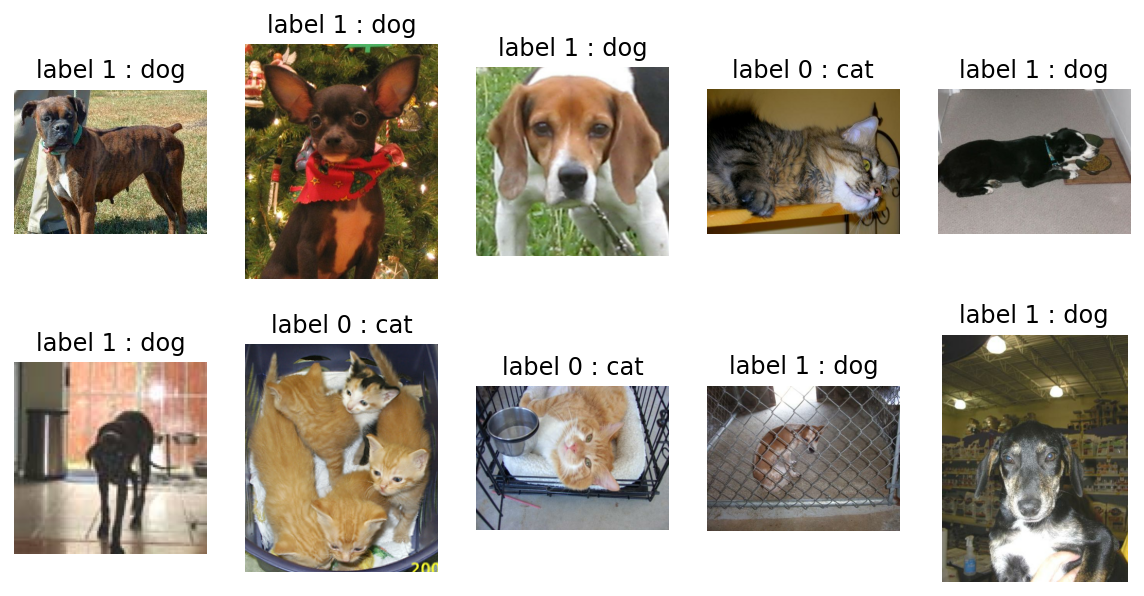

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

plt.figure(figsize=(10,5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train_data.take(10)):
    plt.subplot(2, 5, idx+1)
    plt.imshow(image)
    plt.title(f'label {label} : {get_label_name(label)}')
    plt.axis('off')

In [5]:
IMG_SIZE = 160

def format_example(image, label):
    image = tf.cast(image, tf.float32)
    image = (image/127.5) - 1
    image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE))
    return image, label

In [6]:
train = train_data.map(format_example)
validation = validation_data.map(format_example)
test = test_data.map(format_example)

print(train)
print(validation)
print(test)

<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>
<MapDataset shapes: ((160, 160, 3), ()), types: (tf.float32, tf.int64)>


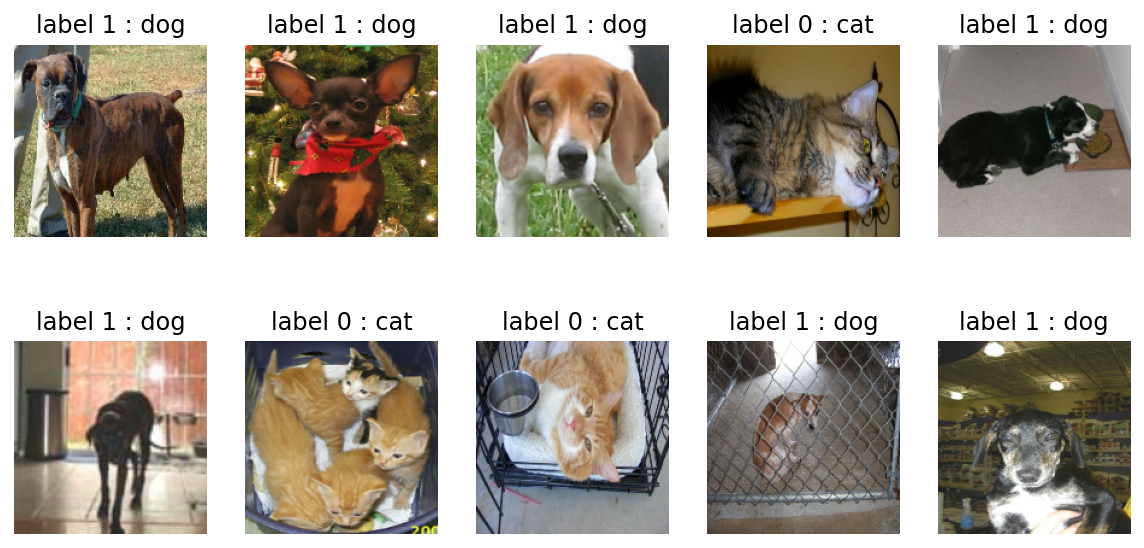

In [7]:
plt.figure(figsize=(10, 5))

get_label_name = metadata.features['label'].int2str

for idx, (image, label) in enumerate(train.take(10)):
    plt.subplot(2, 5, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    plt.title(f'label {label} : {get_label_name(label)}')
    plt.axis('off')

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D

In [10]:
model = Sequential([
    Conv2D(filters=16, kernel_size=3, padding='same', activation='relu', input_shape=(160, 160, 3)),
    MaxPooling2D(),
    Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'),
    MaxPooling2D(),
    Flatten(),
    Dense(units=512, activation='relu'),
    Dense(units=2, activation='softmax')
    ])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 160, 160, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 80, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 80, 80, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 40, 40, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 40, 40, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 20, 20, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 25600)             0

In [13]:
learning_rate = 0.0001
model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=learning_rate), loss=tf.keras.losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [14]:
BATCH_SIZE = 32
SHUFFLE_BUFFER_SIZE = 1000

train_batches = train.shuffle(SHUFFLE_BUFFER_SIZE).batch(BATCH_SIZE)
validation_batches = validation.batch(BATCH_SIZE)
test_batches = test.batch(BATCH_SIZE)

In [15]:
for image_batch, label_batch in train_batches.take(1):
    pass

image_batch.shape, label_batch.shape

(TensorShape([32, 160, 160, 3]), TensorShape([32]))

In [17]:
validation_steps = 20
loss0, accuracy0 = model.evaluate(validation_batches, steps=validation_steps)

print("initial loss: {:.2f}".format(loss0))
print("initial accuracy: {:.2f}".format(accuracy0))

11/20 [===============>..............] - ETA: 0s - loss: 0.6931 - accuracy: 0.5341

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9


20/20 [==============================] - 1s 31ms/step - loss: 0.6936 - accuracy: 0.5281
initial loss: 0.69
initial accuracy: 0.53


Corrupt JPEG data: 252 extraneous bytes before marker 0xd9


In [18]:
EPOCHS = 10
history = model.fit(train_batches, epochs=EPOCHS, validation_data=validation_batches)

Epoch 1/10
168/582 [=======>......................] - ETA: 32s - loss: 0.6742 - accuracy: 0.6183

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


201/582 [=========>....................] - ETA: 29s - loss: 0.6630 - accuracy: 0.6281

210/582 [=========>....................] - ETA: 29s - loss: 0.6618 - accuracy: 0.6286

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


282/582 [=============>................] - ETA: 23s - loss: 0.6443 - accuracy: 0.6393

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


491/582 [========================>.....] - ETA: 7s - loss: 0.6013 - accuracy: 0.6753

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


504/582 [========================>.....] - ETA: 6s - loss: 0.5993 - accuracy: 0.6775

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


514/582 [=========================>....] - ETA: 5s - loss: 0.5990 - accuracy: 0.6780

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


541/582 [==========================>...] - ETA: 3s - loss: 0.5938 - accuracy: 0.6821

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


548/582 [===========================>..] - ETA: 2s - loss: 0.5929 - accuracy: 0.6829

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


582/582 [==============================] - ETA: 0s - loss: 0.5893 - accuracy: 0.6854

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 54s 85ms/step - loss: 0.5893 - accuracy: 0.6854 - val_loss: 0.5125 - val_accuracy: 0.7614
Epoch 2/10
170/582 [=======>......................] - ETA: 23s - loss: 0.5045 - accuracy: 0.7566

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 20s - loss: 0.5036 - accuracy: 0.7557

212/582 [=========>....................] - ETA: 20s - loss: 0.5045 - accuracy: 0.7555

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


284/582 [=============>................] - ETA: 15s - loss: 0.4946 - accuracy: 0.7616

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


492/582 [========================>.....] - ETA: 4s - loss: 0.4766 - accuracy: 0.7717

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


506/582 [=========================>....] - ETA: 3s - loss: 0.4762 - accuracy: 0.7721

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


516/582 [=========================>....] - ETA: 3s - loss: 0.4755 - accuracy: 0.7725

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 1s - loss: 0.4734 - accuracy: 0.7726

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


550/582 [===========================>..] - ETA: 1s - loss: 0.4727 - accuracy: 0.7732

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.4718 - accuracy: 0.7737

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 30s 48ms/step - loss: 0.4715 - accuracy: 0.7739 - val_loss: 0.4962 - val_accuracy: 0.7592
Epoch 3/10
170/582 [=======>......................] - ETA: 16s - loss: 0.4358 - accuracy: 0.8011

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 15s - loss: 0.4346 - accuracy: 0.8012

212/582 [=========>....................] - ETA: 15s - loss: 0.4327 - accuracy: 0.8029

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 12s - loss: 0.4271 - accuracy: 0.8079

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.4107 - accuracy: 0.8152

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


506/582 [=========================>....] - ETA: 3s - loss: 0.4096 - accuracy: 0.8153

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


516/582 [=========================>....] - ETA: 2s - loss: 0.4098 - accuracy: 0.8149

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 1s - loss: 0.4075 - accuracy: 0.8162

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


550/582 [===========================>..] - ETA: 1s - loss: 0.4077 - accuracy: 0.8159

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.4066 - accuracy: 0.8159

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.4065 - accuracy: 0.8159 - val_loss: 0.4676 - val_accuracy: 0.7880
Epoch 4/10
169/582 [=======>......................] - ETA: 17s - loss: 0.3807 - accuracy: 0.8277

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/582 [=========>....................] - ETA: 15s - loss: 0.3770 - accuracy: 0.8300

213/582 [=========>....................] - ETA: 15s - loss: 0.3743 - accuracy: 0.8317

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 12s - loss: 0.3654 - accuracy: 0.8379

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.3532 - accuracy: 0.8450

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.3526 - accuracy: 0.8454

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


515/582 [=========================>....] - ETA: 2s - loss: 0.3511 - accuracy: 0.8461

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.3507 - accuracy: 0.8465

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.3505 - accuracy: 0.8468

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.3490 - accuracy: 0.8475

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.3489 - accuracy: 0.8475 - val_loss: 0.4815 - val_accuracy: 0.7825
Epoch 5/10
169/582 [=======>......................] - ETA: 17s - loss: 0.3213 - accuracy: 0.8665

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/582 [=========>....................] - ETA: 15s - loss: 0.3176 - accuracy: 0.8688

213/582 [=========>....................] - ETA: 15s - loss: 0.3177 - accuracy: 0.8681

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 12s - loss: 0.3117 - accuracy: 0.8725

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.2987 - accuracy: 0.8789

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.2982 - accuracy: 0.8791

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


517/582 [=========================>....] - ETA: 2s - loss: 0.2975 - accuracy: 0.8791

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.2964 - accuracy: 0.8801

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.2966 - accuracy: 0.8798

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.2950 - accuracy: 0.8797

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.2950 - accuracy: 0.8797 - val_loss: 0.4750 - val_accuracy: 0.7923
Epoch 6/10
170/582 [=======>......................] - ETA: 16s - loss: 0.2753 - accuracy: 0.8864

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 15s - loss: 0.2682 - accuracy: 0.8905

212/582 [=========>....................] - ETA: 15s - loss: 0.2669 - accuracy: 0.8911

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


283/582 [=============>................] - ETA: 12s - loss: 0.2616 - accuracy: 0.8936

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


492/582 [========================>.....] - ETA: 3s - loss: 0.2495 - accuracy: 0.8988

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


506/582 [=========================>....] - ETA: 3s - loss: 0.2485 - accuracy: 0.8991

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


516/582 [=========================>....] - ETA: 2s - loss: 0.2489 - accuracy: 0.8988

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 1s - loss: 0.2473 - accuracy: 0.8995

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


548/582 [===========================>..] - ETA: 1s - loss: 0.2467 - accuracy: 0.9000

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.2456 - accuracy: 0.9003

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.2453 - accuracy: 0.9005 - val_loss: 0.5913 - val_accuracy: 0.7605
Epoch 7/10
170/582 [=======>......................] - ETA: 17s - loss: 0.2205 - accuracy: 0.9153

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 15s - loss: 0.2186 - accuracy: 0.9155

212/582 [=========>....................] - ETA: 15s - loss: 0.2155 - accuracy: 0.9177

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 12s - loss: 0.2086 - accuracy: 0.9197

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.1980 - accuracy: 0.9236

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.1972 - accuracy: 0.9240

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


515/582 [=========================>....] - ETA: 2s - loss: 0.1973 - accuracy: 0.9238

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.1961 - accuracy: 0.9243

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.1962 - accuracy: 0.9242

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.1946 - accuracy: 0.9246

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 27s 44ms/step - loss: 0.1946 - accuracy: 0.9246 - val_loss: 0.5201 - val_accuracy: 0.7863
Epoch 8/10
169/582 [=======>......................] - ETA: 16s - loss: 0.1726 - accuracy: 0.9364

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/582 [=========>....................] - ETA: 15s - loss: 0.1710 - accuracy: 0.9364

212/582 [=========>....................] - ETA: 14s - loss: 0.1712 - accuracy: 0.9359

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 11s - loss: 0.1625 - accuracy: 0.9398

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


493/582 [========================>.....] - ETA: 3s - loss: 0.1557 - accuracy: 0.9435

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


505/582 [=========================>....] - ETA: 3s - loss: 0.1551 - accuracy: 0.9438

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


517/582 [=========================>....] - ETA: 2s - loss: 0.1540 - accuracy: 0.9445

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


543/582 [==========================>...] - ETA: 1s - loss: 0.1531 - accuracy: 0.9450

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


549/582 [===========================>..] - ETA: 1s - loss: 0.1527 - accuracy: 0.9450

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


581/582 [============================>.] - ETA: 0s - loss: 0.1517 - accuracy: 0.9451

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.1516 - accuracy: 0.9452 - val_loss: 0.5928 - val_accuracy: 0.7842
Epoch 9/10
170/582 [=======>......................] - ETA: 17s - loss: 0.1304 - accuracy: 0.9540

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


202/582 [=========>....................] - ETA: 15s - loss: 0.1281 - accuracy: 0.9565

212/582 [=========>....................] - ETA: 15s - loss: 0.1278 - accuracy: 0.9568

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


284/582 [=============>................] - ETA: 12s - loss: 0.1217 - accuracy: 0.9588

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


492/582 [========================>.....] - ETA: 3s - loss: 0.1165 - accuracy: 0.9613

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


506/582 [=========================>....] - ETA: 3s - loss: 0.1153 - accuracy: 0.9619

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


516/582 [=========================>....] - ETA: 2s - loss: 0.1148 - accuracy: 0.9620

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 1s - loss: 0.1136 - accuracy: 0.9623

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


550/582 [===========================>..] - ETA: 1s - loss: 0.1138 - accuracy: 0.9621

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.1122 - accuracy: 0.9628

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 43ms/step - loss: 0.1122 - accuracy: 0.9628 - val_loss: 0.6085 - val_accuracy: 0.7859
Epoch 10/10
171/582 [=======>......................] - ETA: 16s - loss: 0.0958 - accuracy: 0.9709

Corrupt JPEG data: 99 extraneous bytes before marker 0xd9


203/582 [=========>....................] - ETA: 15s - loss: 0.0938 - accuracy: 0.9708

213/582 [=========>....................] - ETA: 15s - loss: 0.0921 - accuracy: 0.9717

Corrupt JPEG data: 396 extraneous bytes before marker 0xd9


285/582 [=============>................] - ETA: 12s - loss: 0.0877 - accuracy: 0.9732

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9


492/582 [========================>.....] - ETA: 3s - loss: 0.0858 - accuracy: 0.9740

Corrupt JPEG data: 2226 extraneous bytes before marker 0xd9


506/582 [=========================>....] - ETA: 3s - loss: 0.0846 - accuracy: 0.9744

Corrupt JPEG data: 128 extraneous bytes before marker 0xd9


516/582 [=========================>....] - ETA: 2s - loss: 0.0843 - accuracy: 0.9744

Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


544/582 [===========================>..] - ETA: 1s - loss: 0.0831 - accuracy: 0.9749

Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9


550/582 [===========================>..] - ETA: 1s - loss: 0.0832 - accuracy: 0.9748

Corrupt JPEG data: 228 extraneous bytes before marker 0xd9


580/582 [============================>.] - ETA: 0s - loss: 0.0825 - accuracy: 0.9748

Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 252 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9


582/582 [==============================] - 26s 44ms/step - loss: 0.0825 - accuracy: 0.9749 - val_loss: 0.7001 - val_accuracy: 0.7807


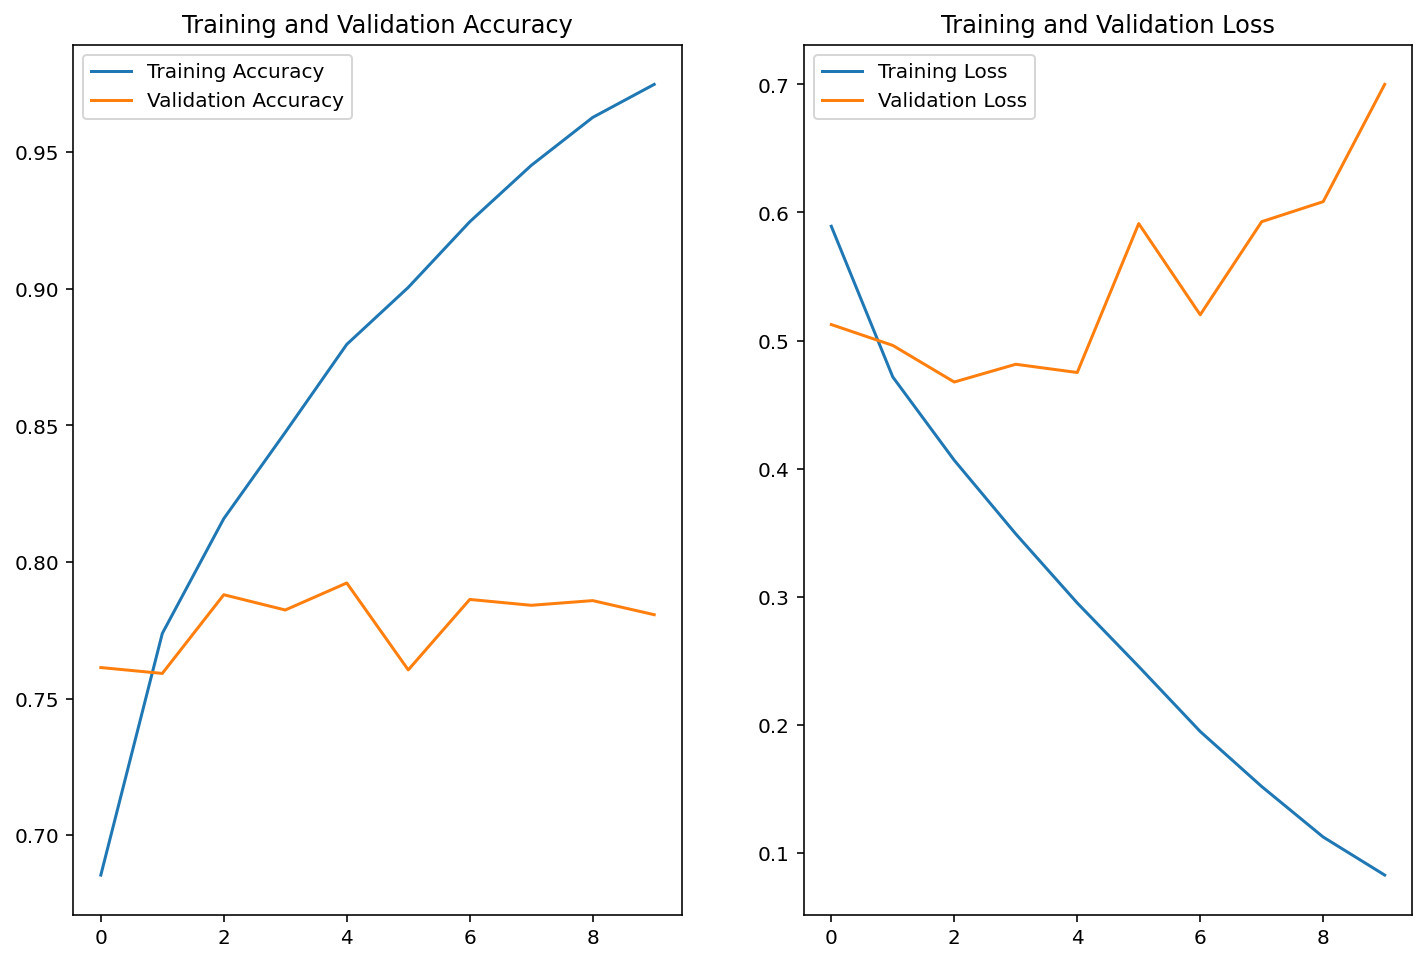

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(12, 8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend()
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

In [21]:
for image_batch, label_batch in test_batches.take(1):
    images = image_batch
    labels = label_batch
    predictions = model.predict(image_batch)
    pass
    
predictions

array([[9.99896646e-01, 1.03321196e-04],
       [9.25450802e-01, 7.45492354e-02],
       [9.20293808e-01, 7.97061473e-02],
       [9.99998808e-01, 1.20653567e-06],
       [4.46145199e-02, 9.55385447e-01],
       [4.72582638e-01, 5.27417362e-01],
       [3.27482522e-01, 6.72517478e-01],
       [7.70202935e-01, 2.29797095e-01],
       [4.56893921e-01, 5.43106079e-01],
       [9.34361219e-01, 6.56388178e-02],
       [1.45695716e-01, 8.54304314e-01],
       [9.99974847e-01, 2.51334750e-05],
       [9.99922514e-01, 7.74497967e-05],
       [1.98425655e-03, 9.98015761e-01],
       [9.96276259e-01, 3.72376200e-03],
       [9.98056591e-01, 1.94342097e-03],
       [6.52296364e-01, 3.47703665e-01],
       [1.04843150e-06, 9.99998927e-01],
       [9.76458549e-01, 2.35414710e-02],
       [9.99997735e-01, 2.25828398e-06],
       [9.75995481e-01, 2.40044855e-02],
       [9.95917380e-01, 4.08265507e-03],
       [9.99645114e-01, 3.54907708e-04],
       [9.20634627e-01, 7.93654025e-02],
       [9.992514

In [22]:
predictions = np.argmax(predictions, axis=1)
predictions

array([0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0])

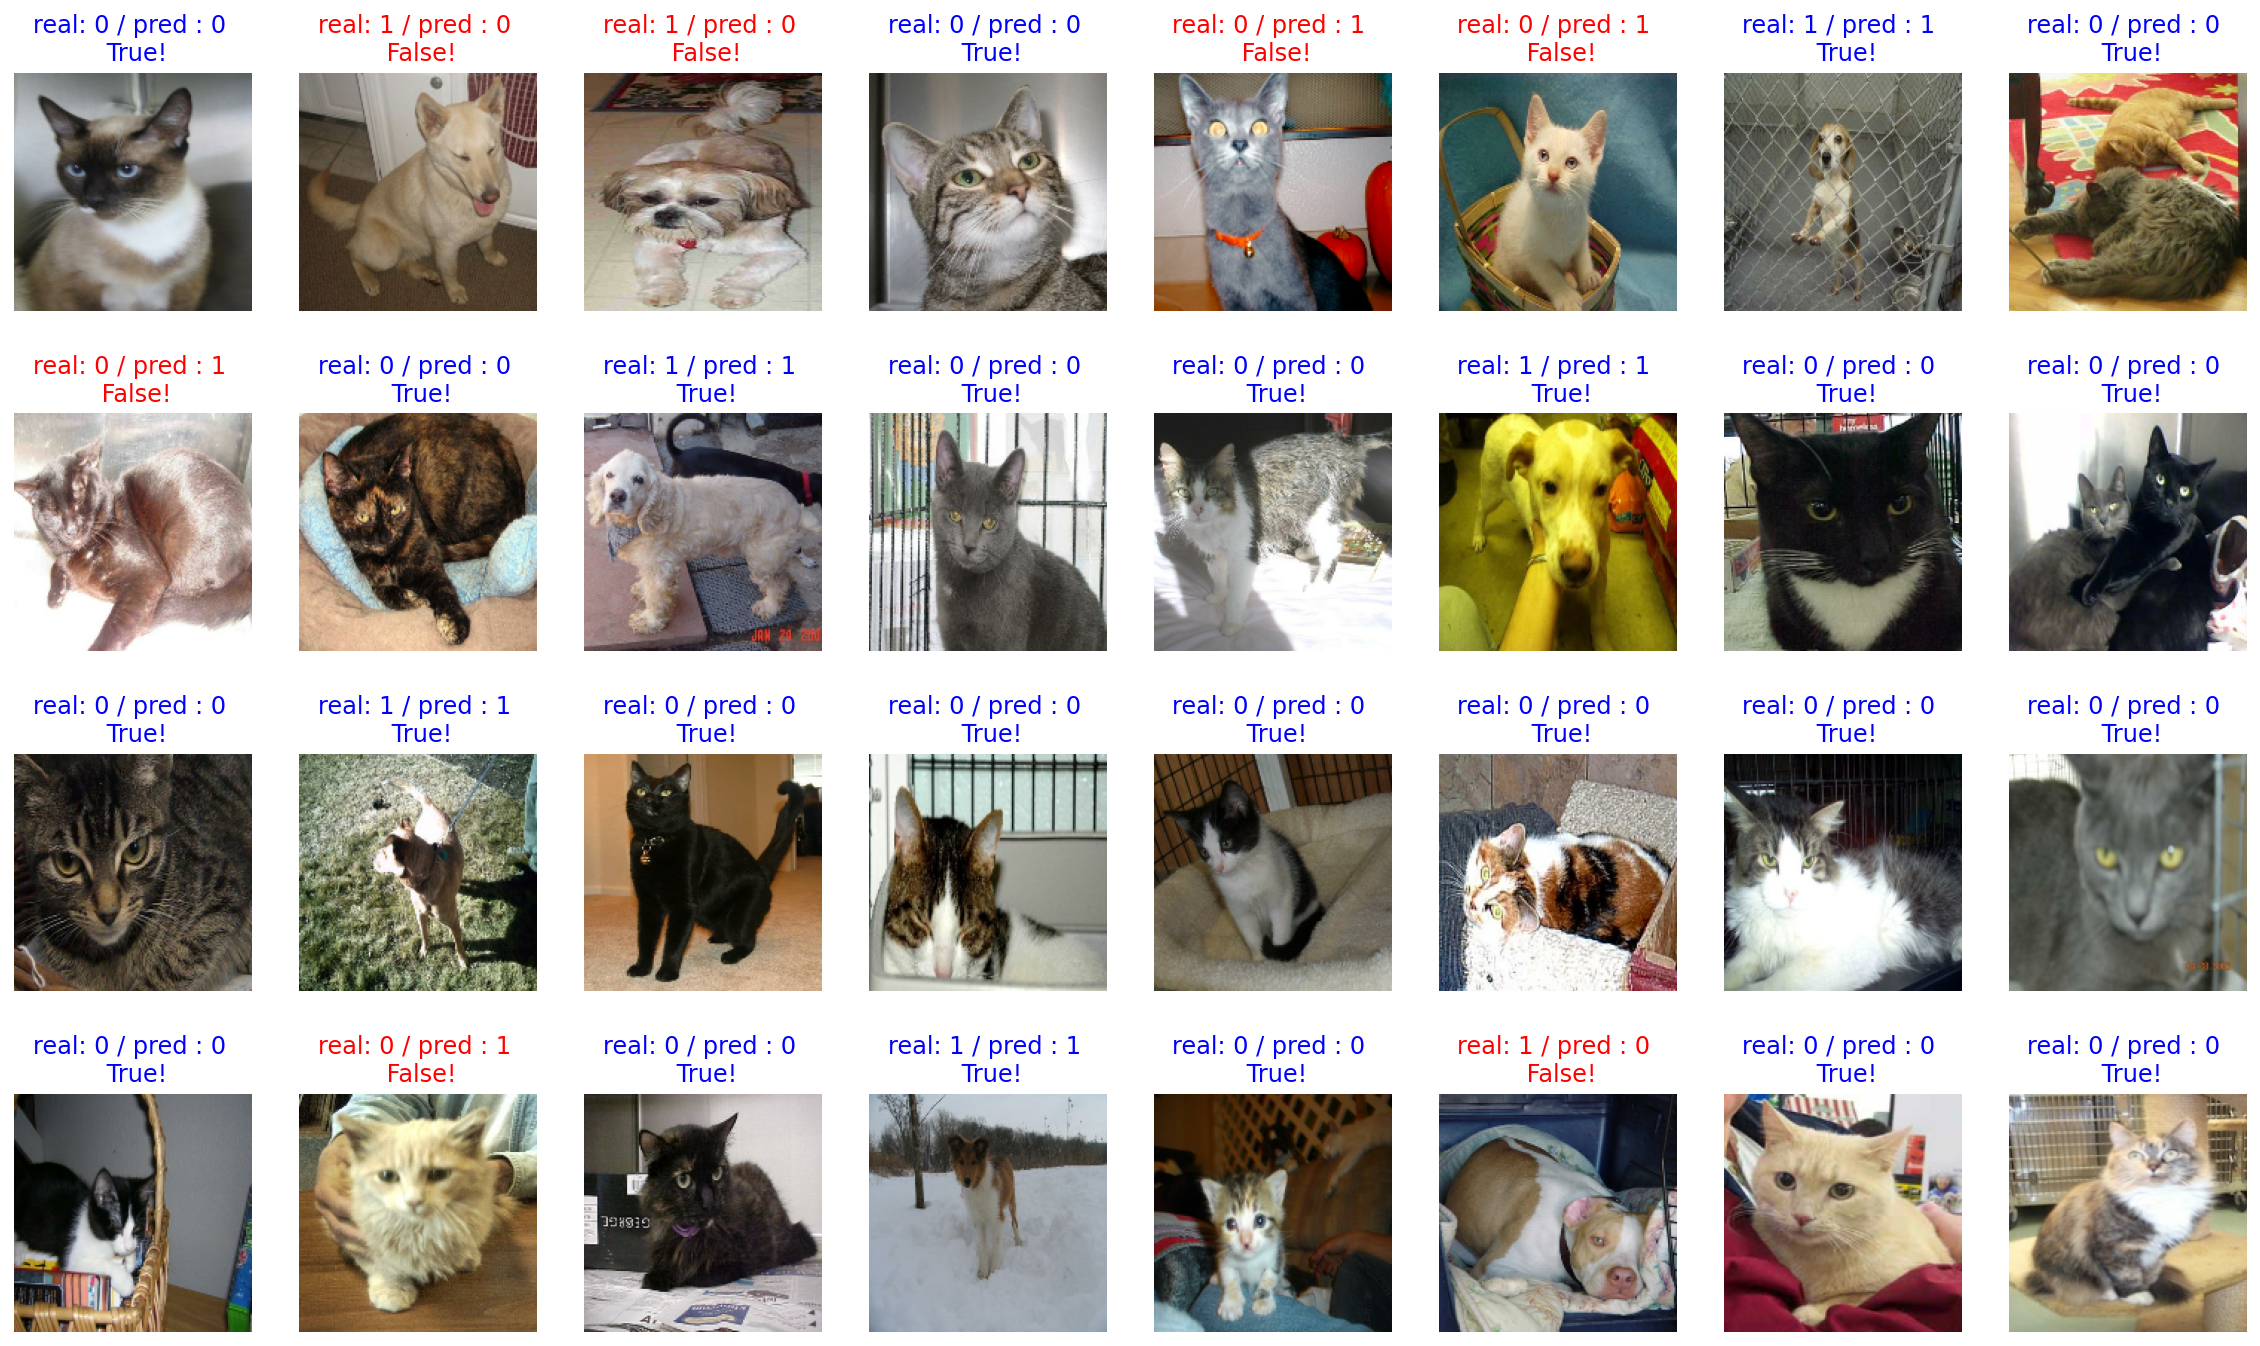

In [23]:
plt.figure(figsize=(20, 12))

for idx, (image, label, prediction) in enumerate(zip(images, labels, predictions)):
    plt.subplot(4, 8, idx+1)
    image = (image + 1) / 2
    plt.imshow(image)
    correct = label == prediction
    title = f'real: {label} / pred : {prediction} \n {correct}!'
    if not correct:
        plt.title(title, fontdict={'color' : 'red'})
    else:
        plt.title(title, fontdict={'color' : 'blue'})
    plt.axis('off')

In [25]:
count = 0

for image, label, prediction in zip(images, labels, predictions):
    correct = label == prediction
    if not correct:
        pass
    else:
        count += 1

print(count)

25
